In [135]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
k = 1/(4 * np.pi * const.epsilon_0)

In [136]:
coords = np.mgrid[-25:26, -25:26]

In [137]:
xgrid = coords[1,:,:]
ygrid = coords[0,:,:]

In [199]:
class Charge:
    def __init__ (self,x,y,q):
        self.x = x
        self.y = y
        self.q = q
        return
    def potential(self,xgrid,ygrid):
        r = np.hypot((xgrid - self.x),(ygrid - self.y))
        return (k* self.q / r)

In [200]:
#HW 1

In [201]:
chargelist = [Charge(-7, 0, -1), Charge(7, 0, -1)]

In [202]:
np.seterr(divide = 'ignore') 
Potential = chargelist[0].potential(xgrid,ygrid) + chargelist[1].potential(xgrid,ygrid)

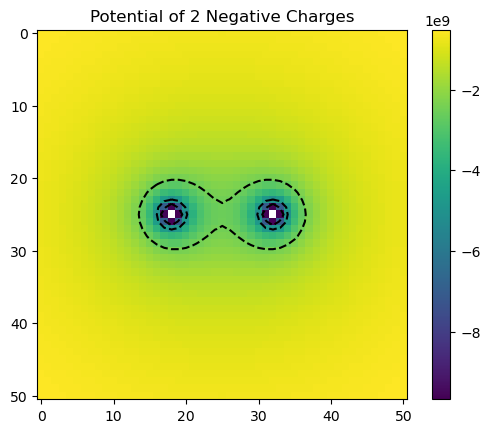

In [203]:
fig, ax = plt.subplots()
plt.imshow(Potential)
plt.colorbar()
plt.title("Potential of 2 Negative Charges")
CS = ax.contour(Potential, 3, colors = 'k')

In [204]:
#HW 2

In [205]:
dipole = [Charge(2,0,1), Charge(-2,0,-1)]

In [233]:
np.seterr(divide = 'ignore') 
dipPotential = dipole[0].potential(xgrid,ygrid) + dipole[1].potential(xgrid,ygrid)

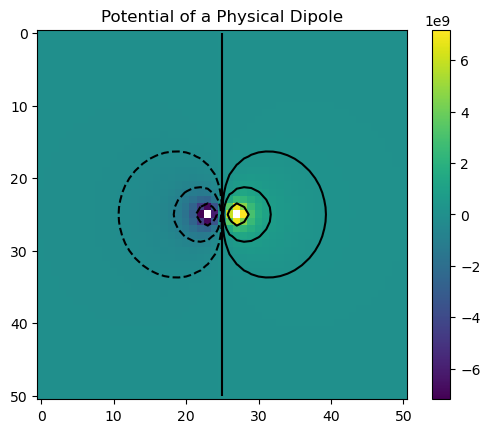

In [242]:
fig, ax = plt.subplots()
plt.imshow(dipPotential)
plt.colorbar()
plt.title("Potential of a Physical Dipole")
levels = [k*-.5,k*-.1,k*-.02,0,k*.02,k*.1,k*.5]

CS = ax.contour(dipPotential, levels, colors = 'k')

We expect that at large *r* the potential will be dominated by the dipole term of the multipole expansion. With the dipole moment **p** = q**d** = 1(4)$\hat{x}$, we expect at large *r* that $V_{dipole}$ = k * $\frac{p * \hat{x}}{r^2}$ which as r -> $\infty$ V -> 0. We can see that the potential of the dipole does in fact fall of as 1/$r^2$ until it eventually becomes 0 as r >> d.

In [208]:
#HW 3

In [237]:
quadrupole = [Charge(5,5,1), Charge(-5,5,-1), Charge(-5,-5,1), Charge(5, -5, -1)]

In [238]:
np.seterr(divide = 'ignore') 
quadPotential = quadrupole[0].potential(xgrid,ygrid) + quadrupole[1].potential(xgrid,ygrid) + quadrupole[2].potential(xgrid,ygrid) + quadrupole[3].potential(xgrid,ygrid)

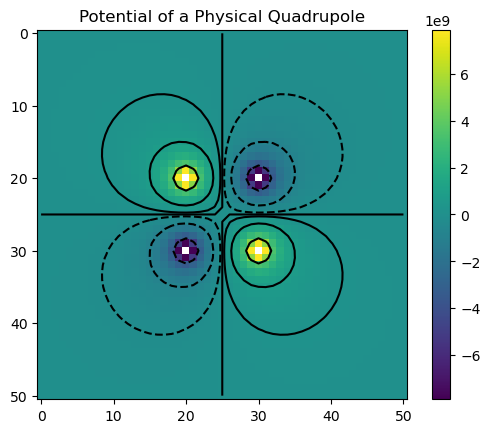

In [239]:
fig, ax = plt.subplots()
plt.imshow(quadPotential)
plt.colorbar()
plt.title("Potential of a Physical Quadrupole")
levels = [k*-.5,k*-.1,k*-.02,0,k*.02,k*.1,k*.5]
CS = ax.contour(quadPotential,levels,colors = 'k')

The potential of a physical quadrupole composed of point charges depends on the quadrupole term of the multipole expansion. Since the 1/r monopole term and 1/r^2 dipole terms now cancel out, the potential is dominated by the 1/r^3 term. Interestingly, we can see that the potential goes to zero along the axes, while leaving a hole at the origin.

In [232]:
#HW 4

In [247]:
Edipole = np.gradient(dipPotential)
Edipoledeg = np.degrees(np.arctan2(Edipole[0],Edipole[1]))

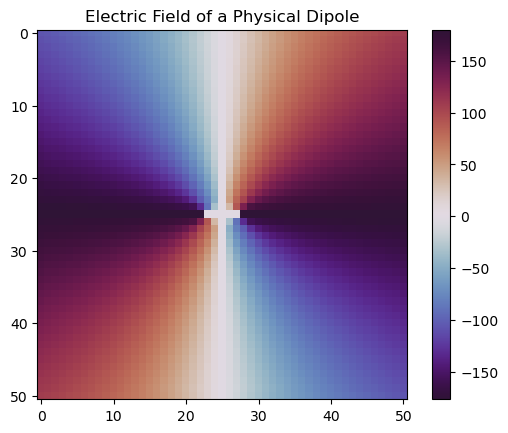

In [254]:
fig, ax = plt.subplots()
plt.imshow(Edipoledeg,cmap='twilight_shifted')
plt.colorbar()
plt.title("Electric Field of a Physical Dipole")
levels = []
CS = ax.contour(Edipoledeg,levels,colors = 'k')

In [255]:
#HW 5

The potential method is simpler because we are able to compute the value of a pixel directly from its previous potential value. In the case of multiple (n) charges, being able to compute the cell directly from the previous value instead of computing the value for each charge separately saves (n-1) time per cell. However, a weakness of this method of computing the electric field occurs when adding charges to an existing configuration. In the case of each charge computing its own field, we would simply be able to superimpose the new charge on the fields of the old charges. However, when adding charges with the potential method we are forced to recalculate the potential for the entire grid, and only then can we find the electric field, adding an extra set of operations to the calculation.